In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [5]:
%matplotlib inline

In [14]:
sns.set_style(style = 'white')
plt.style.use('fivethirtyeight')

In [16]:
df = pd.read_excel(r"C:\Users\CR GAYATHRI\Desktop\MachineLearning\Amaresh\polynomial  sample data.xlsx")

In [17]:
df.head()

,X,Y
0,5,28
1,15,11
2,25,2
3,34,9
4,43,29


In [19]:
df.cov()

,X,Y
X,336.7,68.500000
Y,68.5,150.166667


In [20]:
df.corr()

,X,Y
X,1.000000,0.304637
Y,0.304637,1.000000


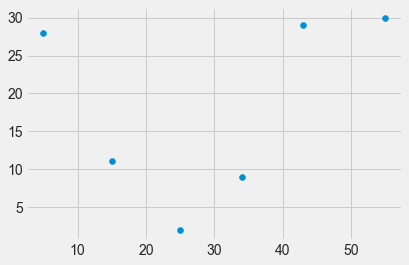

In [23]:
plt.scatter(df.X,df.Y)

In [33]:
X = np.array(df.X).reshape(-1,1)
Y = np.array(df.Y).reshape(-1,1)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [44]:
model = LinearRegression()

In [45]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
model.coef_

array([[0.2034452]])

In [48]:
model.intercept_

array([12.16503317])

In [51]:
pred = model.predict(X)

In [52]:
pred

array([[13.18225918],
       [15.21671122],
       [17.25116325],
       [19.08217008],
       [20.91317691],
       [23.35451935]])

In [56]:
r2_score(Y,pred)

0.09280352787566992

In [57]:
X.shape

(6, 1)

In [63]:
y_flatten = pred.flatten()

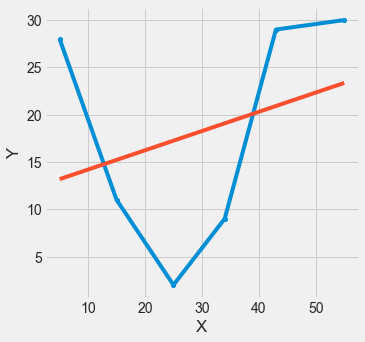

In [72]:
plt.figure(figsize= (5,5))

sns.scatterplot(df.X,df.Y)

sns.lineplot(df.X,df.Y)

sns.lineplot(df.X,y_flatten)

plt.show();

## Polynomial Regression

In [73]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
X

array([[ 5],
       [15],
       [25],
       [34],
       [43],
       [55]], dtype=int64)

In [88]:
Y

array([[28],
       [11],
       [ 2],
       [ 9],
       [29],
       [30]], dtype=int64)

In [89]:
reg = PolynomialFeatures(degree = 3)

In [90]:
X_poly = reg.fit_transform(X)

In [91]:
prm = LinearRegression()

In [94]:
prm.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
prm.coef_

array([[ 0.00000000e+00, -5.29094823e+00,  1.75068180e-01,
        -1.55748430e-03]])

In [96]:
prm.intercept_

array([51.76860926])

In [97]:
prm_pred = prm.predict(X_poly)

In [98]:
prm_pred

array([[29.4958871 ],
       [ 6.53821691],
       [ 4.5768241 ],
       [13.03982309],
       [24.12799675],
       [31.22125206]])

In [99]:
r2_score(Y,prm_pred)

0.9063264126921857

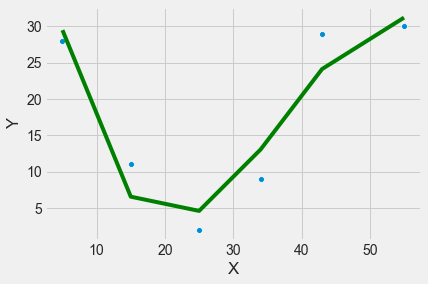

In [103]:
sns.scatterplot(df.X,df.Y)

sns.lineplot(df.X, prm_pred.flatten(), color = 'green')

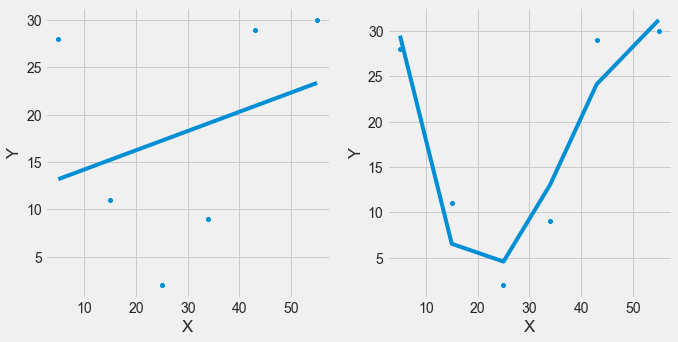

In [107]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.scatterplot(df.X,df.Y)
sns.lineplot(df.X,y_flatten)

plt.subplot(122)
sns.scatterplot(df.X,df.Y)
sns.lineplot(df.X,prm_pred.flatten())

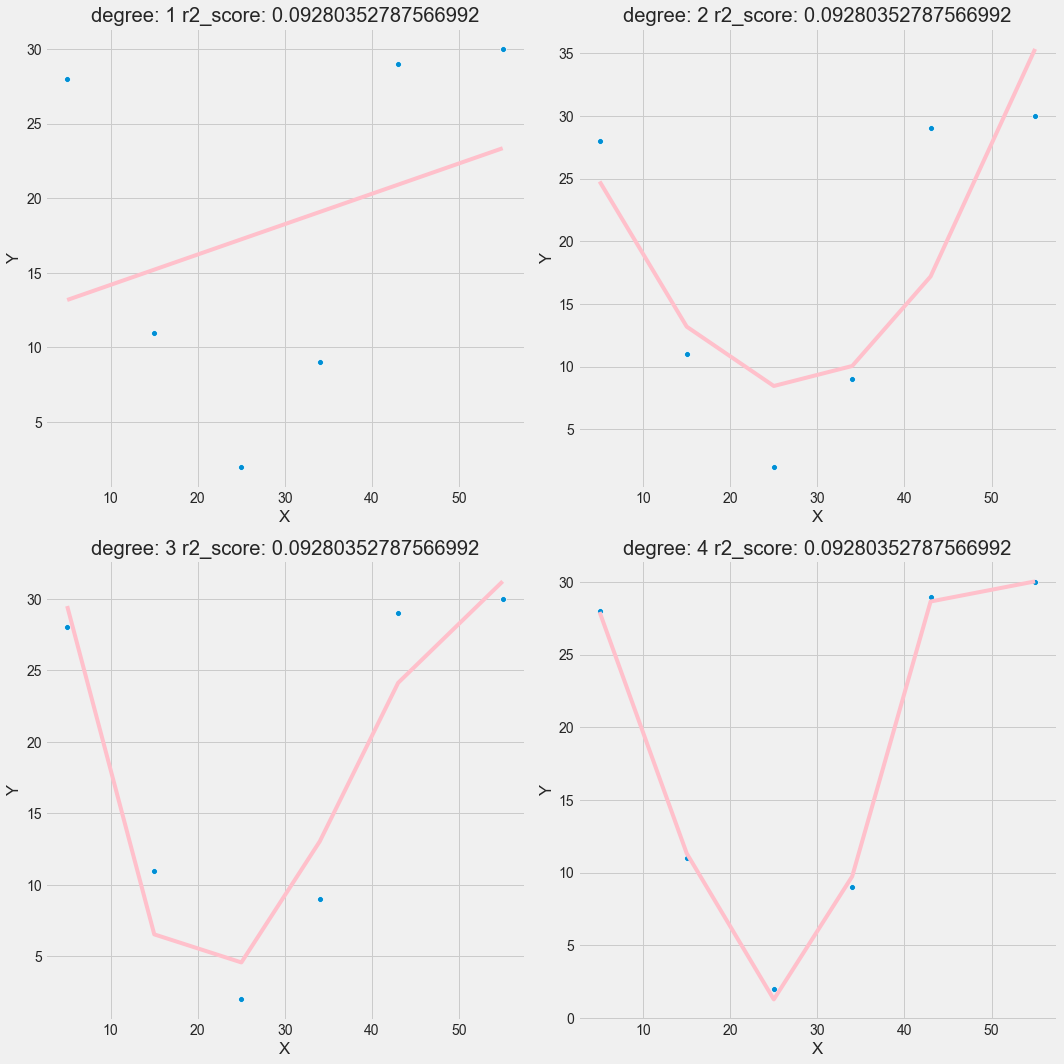

In [125]:
plt.figure(figsize = (15,15))
for i in range(1,5):
    reg = PolynomialFeatures(degree = i)
    X_poly = reg.fit_transform(X)
    prm = LinearRegression()
    prm.fit(X_poly,Y)
    
    prm_pred = prm.predict(X_poly)
    
    plt.subplot(2,2,i)
    sns.scatterplot(df.X,df.Y)
    sns.lineplot(df.X,prm_pred.flatten(), color = 'pink')
    plt.title("degree: "+ str(i)+ " r2_score: "+ str(r2_score(df.Y,pred.flatten())))
plt.tight_layout()
plt.show()